In [1]:
#!/usr/bin/env python3

import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [79]:
csv1 = ['./csv_1/tag_0.csv',
              './csv_1/tag_1.csv',
              './csv_1/tag_2.csv',
              './csv_1/tag_3.csv']

csv2 = ['./csv_2/tag_0.csv',
              './csv_2/tag_1.csv',
              './csv_2/tag_2.csv',
              './csv_2/tag_3.csv']

csv1_ = ['./csv_1/tag_0.csv.converted.csv',
              './csv_1/tag_1.csv.converted.csv',
              './csv_1/tag_2.csv.converted.csv',
              './csv_1/tag_3.csv.converted.csv']

csv2_ = ['./csv_2/tag_0.csv.converted.csv',
              './csv_2/tag_1.csv.converted.csv',
              './csv_2/tag_2.csv.converted.csv',
              './csv_2/tag_3.csv.converted.csv']

In [204]:
def read_pos(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    
    x = []
    y = []
    z = []
    
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
    return x, y, z


def read_pos_xy(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    x = []
    y = []
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
    return x, y

In [209]:
def tag_uav_pos(files):
    print('files:',files)
    fig = plt.figure(figsize=(18, 14), dpi=90)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    ax.set_zlabel('z, Up')
        
    for file, col, name in zip(files,
                               ['orange','r','b','g'],
                              ['tag_0','tag_1','tag_2','tag_3']):
        
        x, y, z = read_pos(file) 
        mean_x, mean_y, mean_z = np.mean(x), np.mean(y), np.mean(z)
        ax.plot(x, y, z, '.', color=col, label = name)
        ax.plot(mean_x, mean_y, mean_z, 'o', color='black')
        print(name, '& 平均[m] & 最大偏差[m] & 標準偏差[m]')
        for ziku, label in zip([x, y, z], ['x', 'y', 'z']):
            print(label, '&', 
                  '{:.03f}'.format(np.mean(ziku)), '&', 
                  '{:.03f}'.format(np.max(np.abs(ziku - np.mean(ziku)))) , '&', 
                  '{:.03f}'.format(np.std(ziku)))
        print('---------------')
    ax.legend()
    plt.show()

files: ['./csv_1/tag_0.csv.converted.csv', './csv_1/tag_1.csv.converted.csv', './csv_1/tag_2.csv.converted.csv', './csv_1/tag_3.csv.converted.csv']
tag_0 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & -1.659 & 3.608 & 0.800
y & 5.663 & 1.963 & 0.532
z & 1.649 & 1.392 & 0.543
---------------
tag_1 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 2.931 & 16.538 & 0.963
y & 7.546 & 34.970 & 1.786
z & 1.564 & 5.550 & 0.578
---------------
tag_2 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 7.806 & 2.414 & 0.472
y & 8.709 & 2.089 & 0.525
z & 1.408 & 2.034 & 0.608
---------------
tag_3 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 12.590 & 18.192 & 1.757
y & 9.838 & 10.165 & 1.033
z & 1.821 & 7.219 & 1.044
---------------


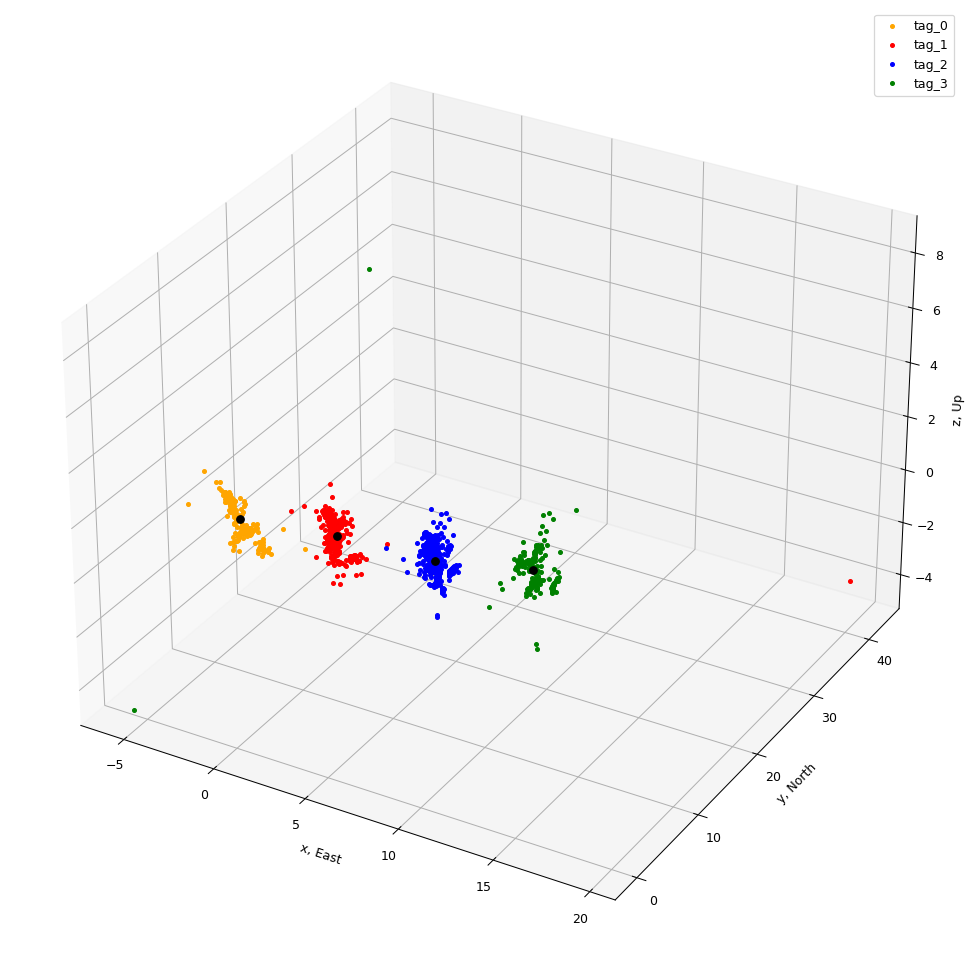

files: ['./csv_2/tag_0.csv.converted.csv', './csv_2/tag_1.csv.converted.csv', './csv_2/tag_2.csv.converted.csv', './csv_2/tag_3.csv.converted.csv']
tag_0 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 0.414 & 0.882 & 0.257
y & 6.472 & 1.309 & 0.292
z & 2.122 & 1.788 & 0.365
---------------
tag_1 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 4.646 & 1.067 & 0.470
y & 7.087 & 1.090 & 0.382
z & 1.747 & 1.550 & 0.696
---------------
tag_2 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 9.214 & 1.478 & 0.546
y & 8.345 & 1.118 & 0.380
z & 2.106 & 1.674 & 0.620
---------------
tag_3 & 平均[m] & 最大偏差[m] & 標準偏差[m]
x & 13.716 & 1.397 & 0.607
y & 9.836 & 1.175 & 0.345
z & 2.261 & 2.179 & 0.590
---------------


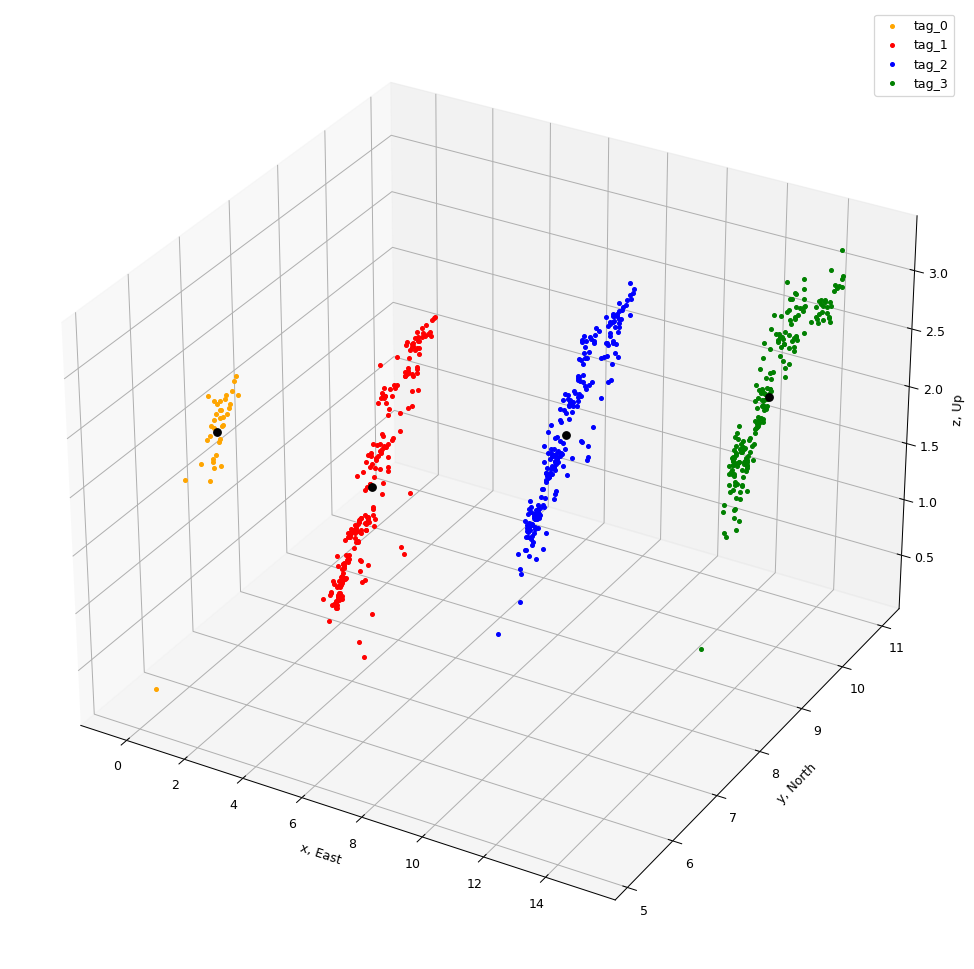

In [210]:
# initioal_postionに対する　Tagの位置
tag_uav_pos(csv1_)
tag_uav_pos(csv2_)

In [202]:
def tag_pos_xy(files):
    
    fig = plt.figure(figsize=(18, 14), dpi=90)
    ax = fig.add_subplot(111)
    ax.set_xlabel('x, East [m]')
    ax.set_ylabel('y, North [m]')
        
    for file, col, name in zip(files,
                               ['orange','r','b','g'],
                              ['tag_0','tag_1','tag_2','tag_3']):
        
        x, y = read_pos_xy(file) 
        mean_x = np.mean(x)
        mean_y = np.mean(y)
        ax.plot(x, y, '.', color=col, label = name)
        ax.plot(mean_x, mean_y, 'o', color='black')
        draw_circle = plt.Circle((mean_x, mean_y), 1, fill=col, alpha=0.4)
        ax.add_artist(draw_circle)
    ax.set_xlim(-5,15)
    ax.set_ylim(4,13)
    ax.legend()
    plt.show()

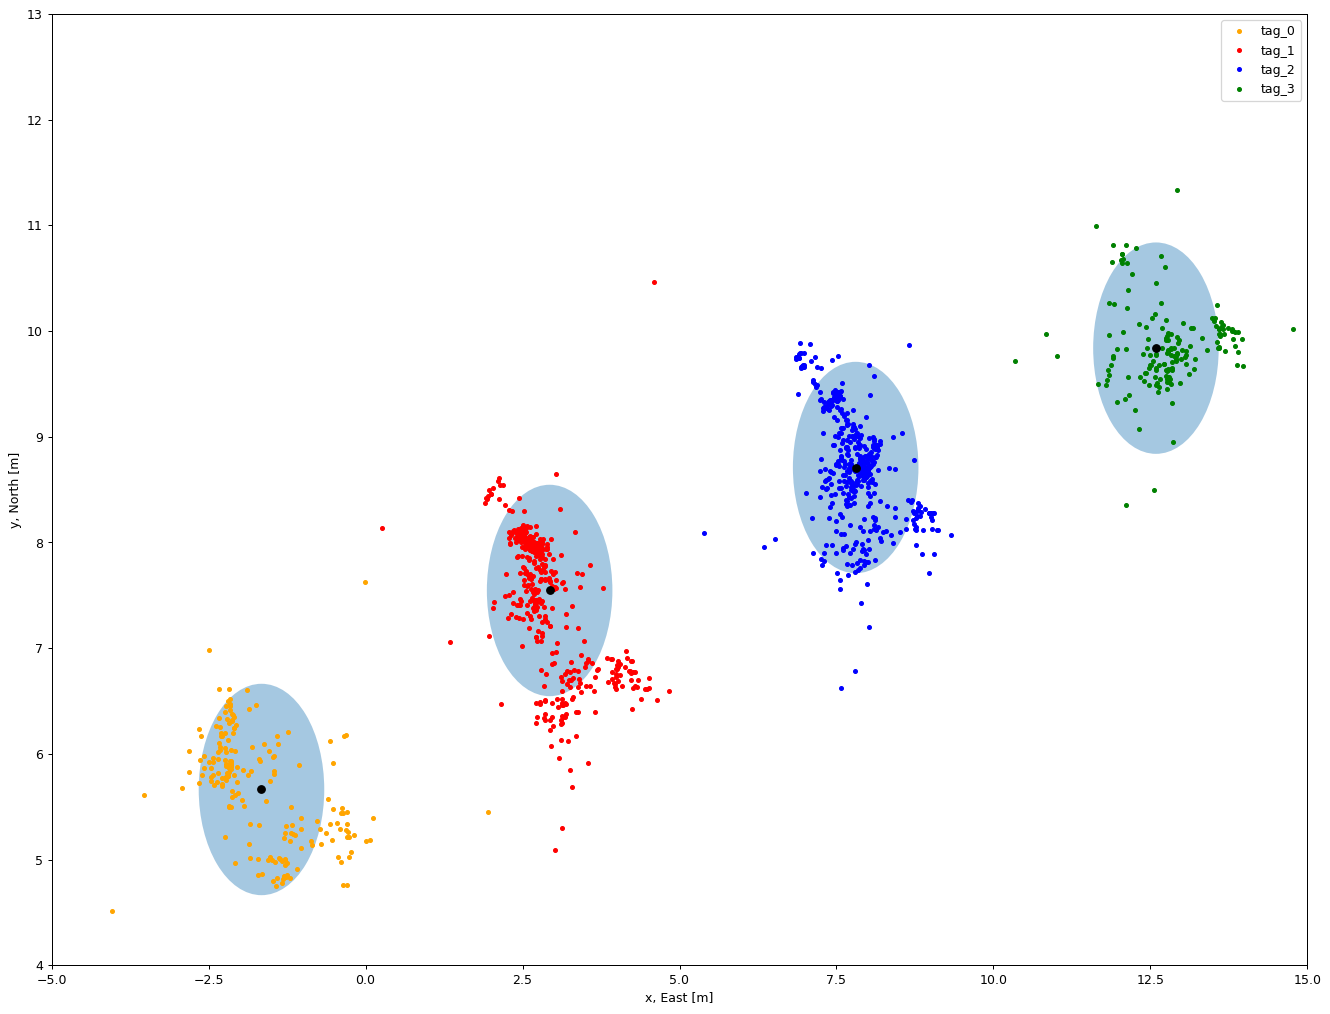

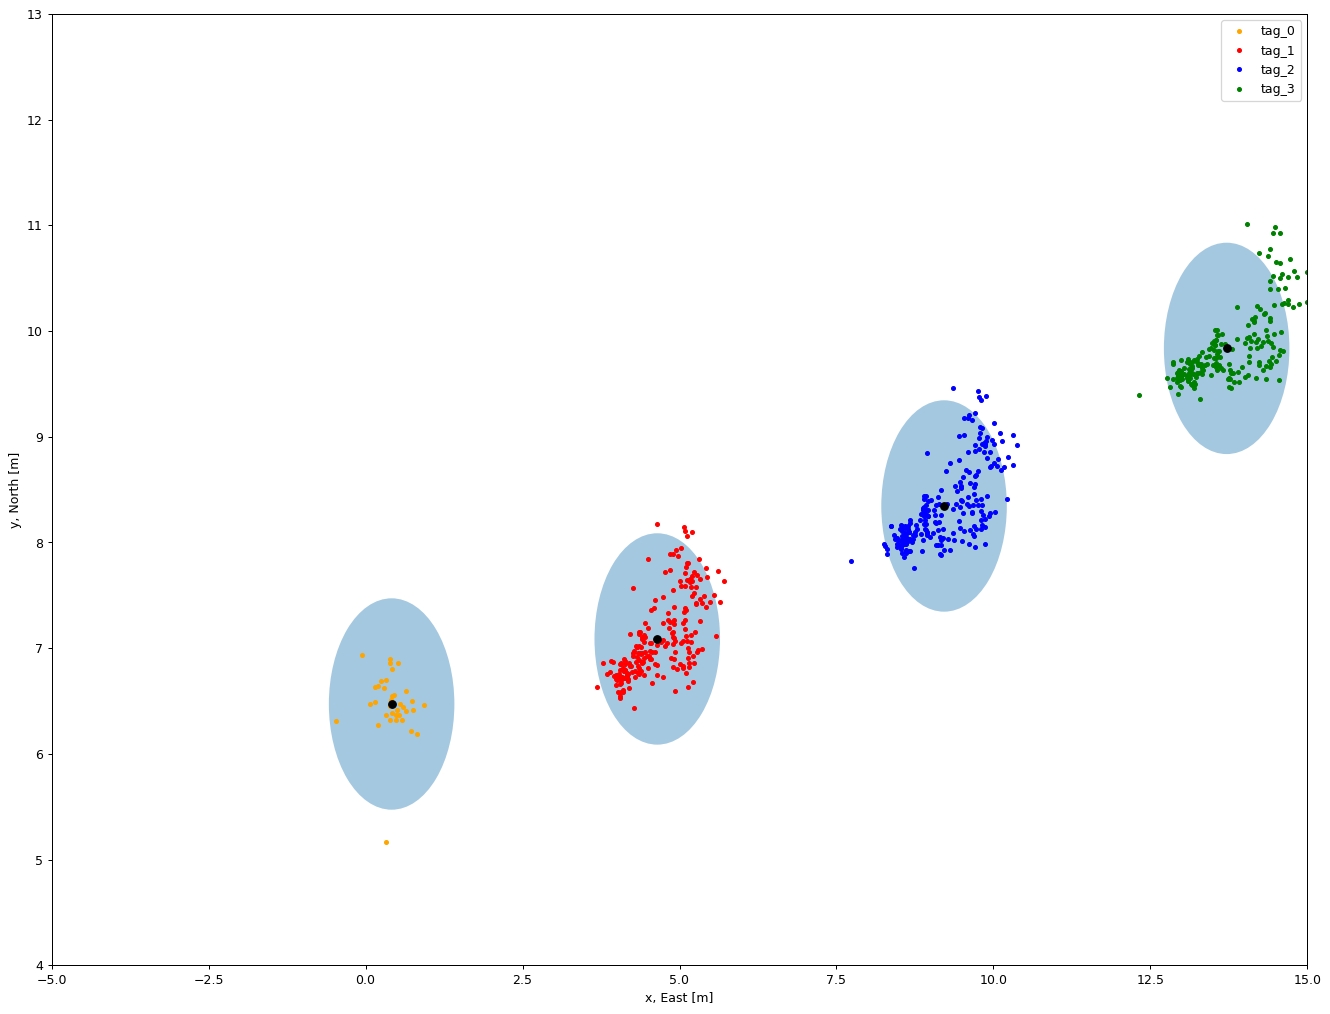

In [203]:
tag_pos_xy(csv1_)
tag_pos_xy(csv2_)

In [ ]:
def read_pos_xyd(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    x = []
    y = []
    d = []
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        d.append(np.sqrt(float(row[1])**2 + float(row[1])**2))
    return x, y

def in_circle(files, dx, dy):        
    for file, col, name in zip(files,['orange','r','b','g'],['tag_0','tag_1','tag_2','tag_3']):
        x, y = read_pos_xy(file) 
        mean_x = np.mean(x)
        mean_y = np.mean(y)
    ax.set_xlim(-5,15)
    ax.set_ylim(4,13)
    ax.legend()
    plt.show()

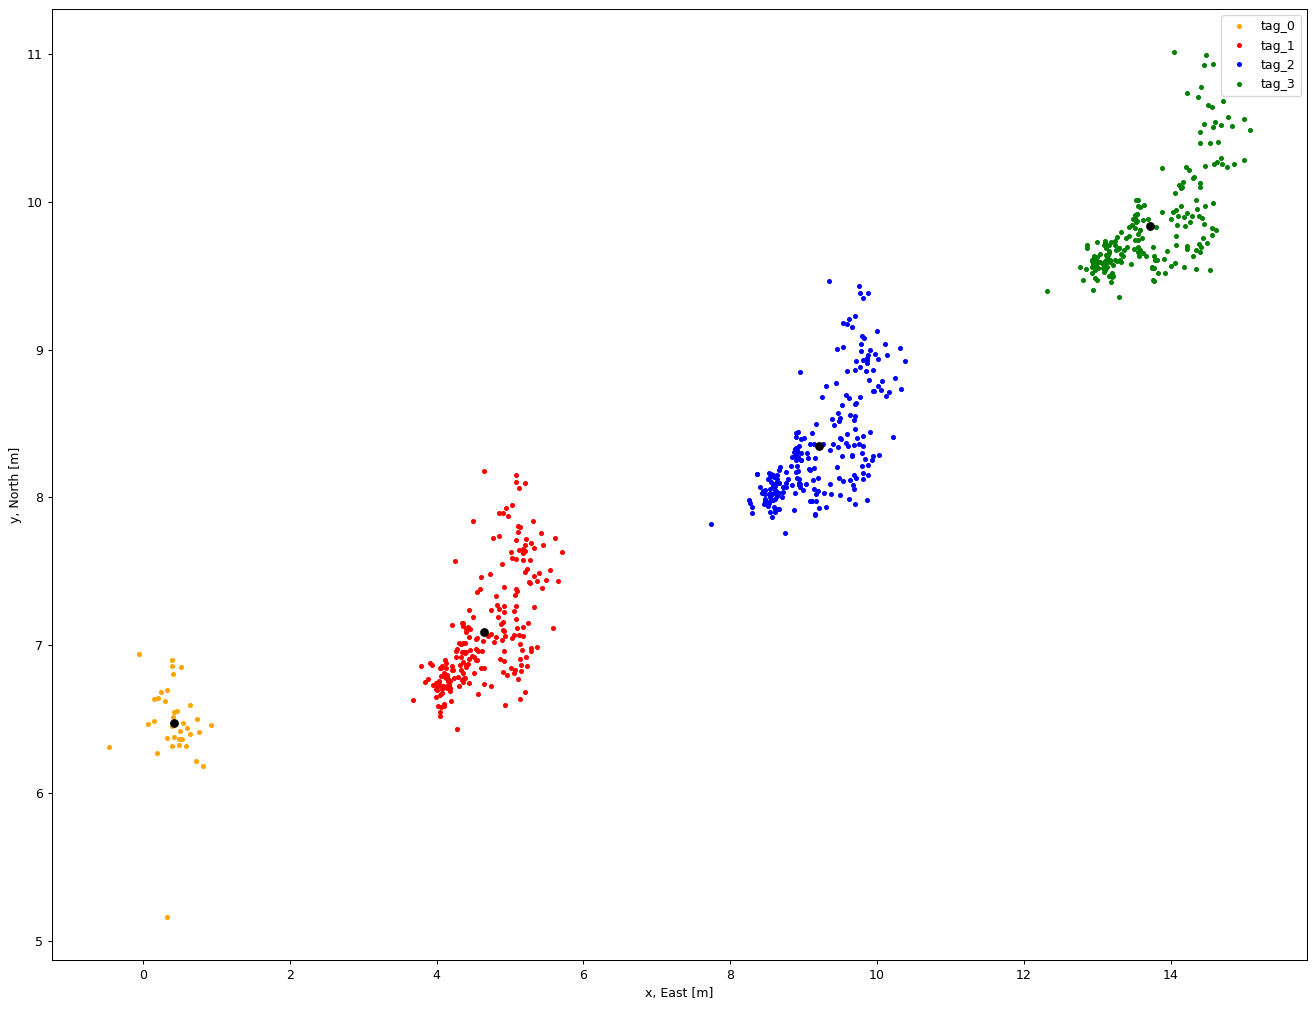

In [185]:
tag_pos_xy(csv2_)

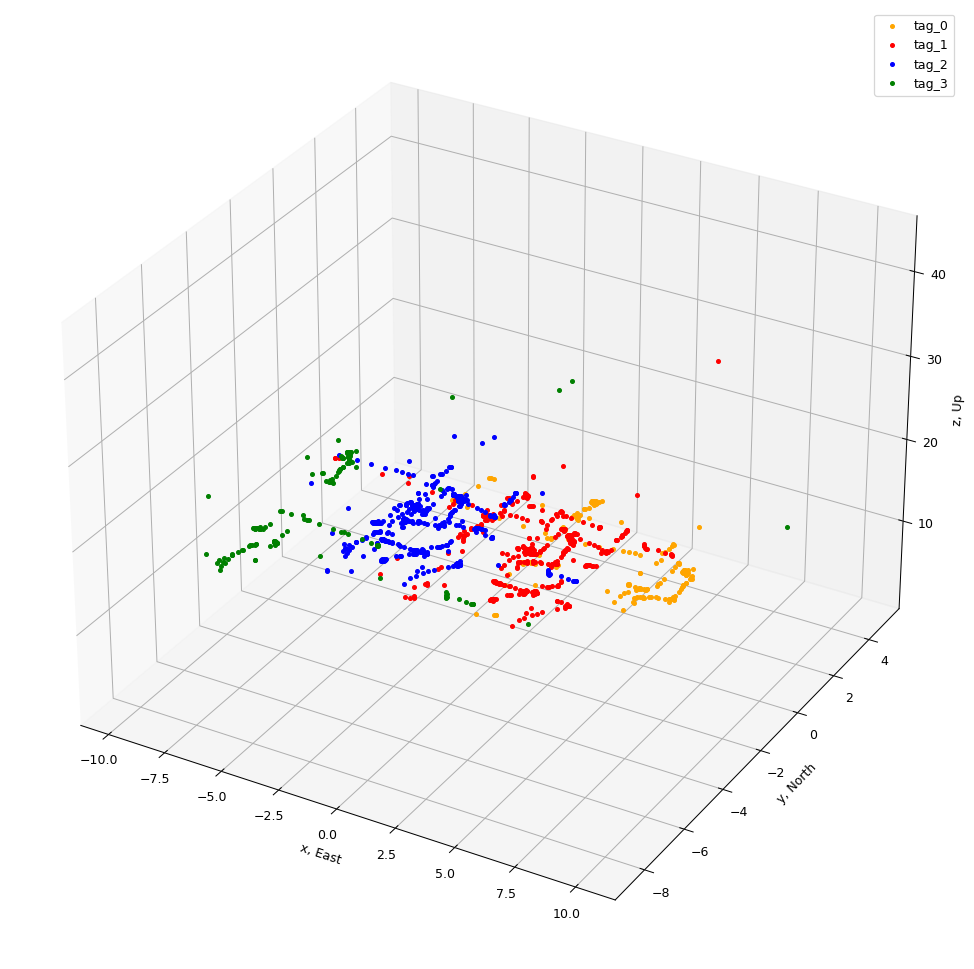

In [86]:
tag_uav_pos(csv1)

files: ['./csv_2/tag_0.csv', './csv_2/tag_1.csv', './csv_2/tag_2.csv', './csv_2/tag_3.csv']
tag_0 : mean_x / mean_y / mean_z
-0.4304084810805555 / 4.208564988055556 / 18.483202144333333
------
tag_1 : mean_x / mean_y / mean_z
-0.8044022189909911 / 0.8705437302456757 / 12.172220482427926
------
tag_2 : mean_x / mean_y / mean_z
-1.0129828504121738 / -2.4416372253069567 / 14.628113590321739
------
tag_3 : mean_x / mean_y / mean_z
-1.5363251837826088 / -5.769721758458938 / 16.80991150294686
------


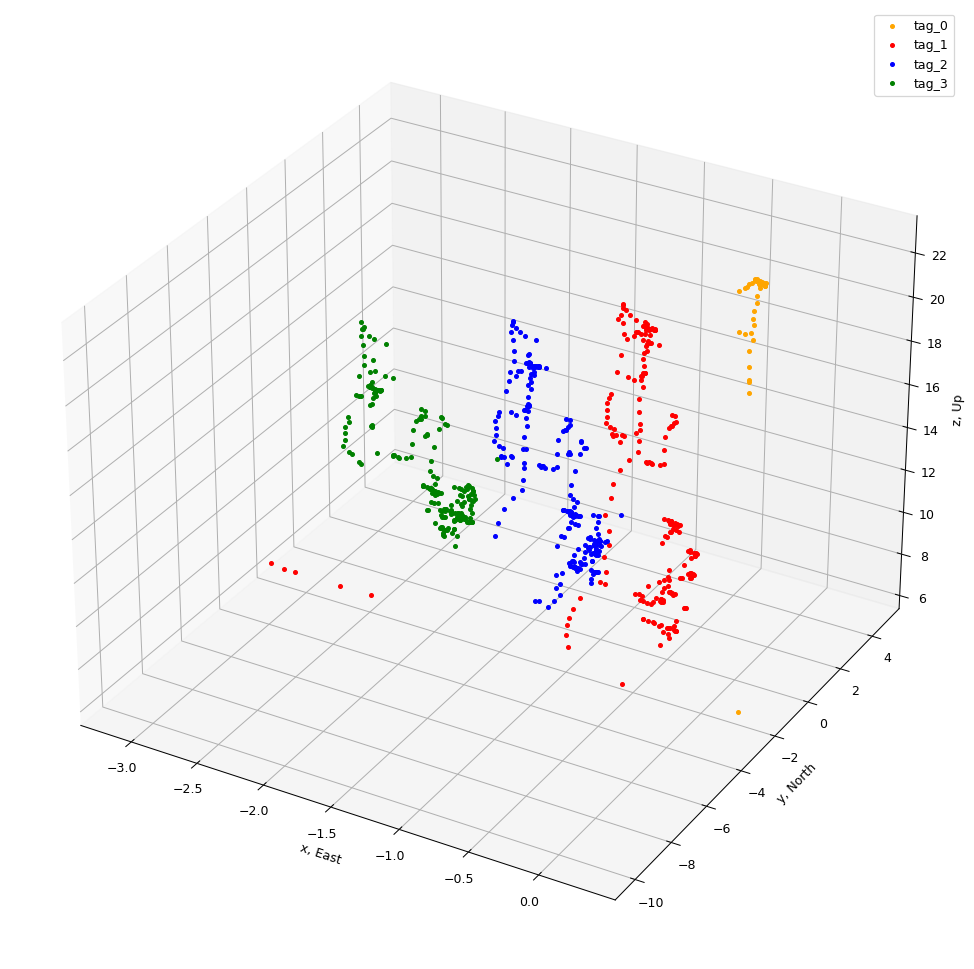

In [131]:
tag_uav_pos(csv2)

In [87]:
def read_pos_all(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    t = []
    x = []
    y = []
    z = []
    
    for row in data[1:]:
        if row[1] == '':
            continue
        t.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
    return t, x, y, z

In [89]:
read_pos_all(csv2[0])

([1642401016.8087926,
  1642401156.4051049,
  1642401157.4518597,
  1642401166.056195,
  1642401167.0606735,
  1642401167.5295074,
  1642401167.9112613,
  1642401168.4361103,
  1642401169.0765734,
  1642401169.6591952,
  1642401170.3094306,
  1642401171.208158,
  1642401171.974174,
  1642401172.5536702,
  1642401173.2081532,
  1642401173.795308,
  1642401174.2817926,
  1642401174.6394677,
  1642401175.3207116,
  1642401176.009551,
  1642401176.4879456,
  1642401177.0883567,
  1642401177.5967069,
  1642401178.1973484,
  1642401178.886085,
  1642401179.2916665,
  1642401179.856229,
  1642401180.3176584,
  1642401180.8089366,
  1642401181.3495731,
  1642401181.8281302,
  1642401182.3449728,
  1642401182.95993,
  1642401183.5412934,
  1642401183.8132372,
  1642401184.5252018],
 [0.2877820151,
  -0.5723212975,
  -0.5223221932,
  -0.4841887208,
  -0.4751379041,
  -0.4893783518,
  -0.4801482762,
  -0.4698599555,
  -0.4807519448,
  -0.4832709412,
  -0.4921864843,
  -0.479011797,
  -0.463526275

In [224]:
def in_circle_percent(x, y, r):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cnt = 0
    for i in range(len(x)):
        d = np.sqrt((x[i]-mean_x)**2 + (y[i]-mean_y)**2)
        if d <= r:
            cnt += 1
    print('{:.02f}'.format(cnt/len(x)*100),'%')

In [228]:
for file in file1_paths_convert:
    x, y = read_pos_xy(file)
    in_circle_percent(x, y, 1)

76.88 %
73.03 %
82.87 %
75.00 %


In [229]:
for file in file2_paths_convert:
    x, y = read_pos_xy(file)
    in_circle_percent(x, y, 1)

97.22 %
95.05 %
91.30 %
87.44 %
